In [1]:
#importing necessary packages for simple data cleaning and manipulation 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#extracting the csv file 
abalone_data = pd.read_csv("abalone.csv")

#displaying the first 5 items of the dataframe
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#renaming the column names to better work the data 

In [4]:
# cheking the structure of the dataset 
abalone_data.shape

(4177, 9)

In [5]:
#checking if there are any NaN types in the data 
abalone_data.isna().any(axis=1).sum()

np.int64(0)

In [6]:
#renaming some columns to better work with the data 
abalone_data = abalone_data.rename(
    columns={
        
        "Whole weight": "Whole_weight",
        "Shucked weight": "Shucked_weight",
        "Viscera weight": "Viscera_weight"
        }
    )

In [7]:
#there is no nan types available in this dataset 
#now let us list the column names 
abalone_data_columnNames = pd.DataFrame(abalone_data.columns)

#printing them 
abalone_data_columnNames

,0
0,Sex
1,Length
2,Diameter
3,Height
4,Whole_weight
5,Shucked_weight
6,Viscera_weight
7,Shell weight
8,Rings


## Model 1 

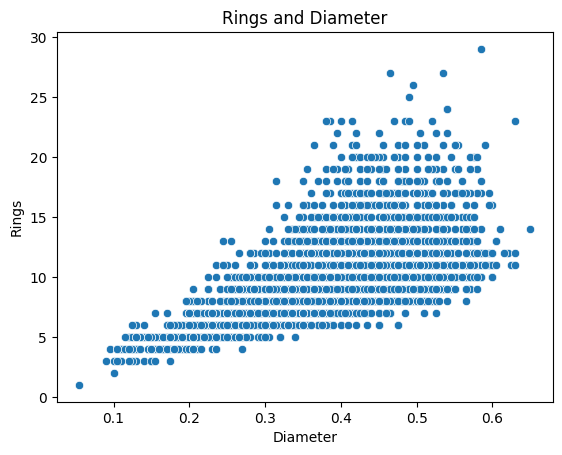

In [8]:
# conducting exploratory data analysis 
fig = sns.scatterplot(x=abalone_data["Diameter"], y=abalone_data["Rings"], data=abalone_data)

#labeling the title 
fig.set_title("Rings and Diameter")

#showing the plot 
plt.show()

### Model construction 

In [9]:
# importing the correct packages 
from statsmodels.formula.api import ols

In [10]:
# formula construction 
ols_formula = "Rings ~ Diameter"

#data construction 
ols_data = abalone_data[["Rings", "Diameter"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2059.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:14:57   Log-Likelihood:                -9979.2
No. Observations:                4177   AIC:                         1.996e+04
Df Residuals:                    4175   BIC:                         1.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3186      0.173     13.423      0.000       1.980       2.657
Diameter      18.6699      0.411     45.371      0.000      17.863      19.477
==============================================================================
Omnibus:                     1414.851   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4737.552
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       6.933   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# R^2 Is 0.330  which is really low 

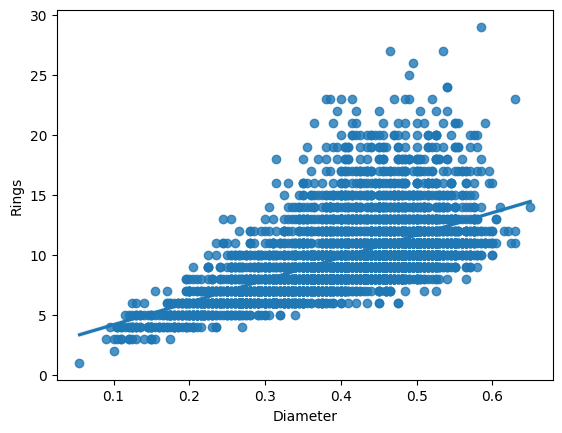

In [12]:
# using the regplot to visualize the regression line 
sns.regplot(x="Diameter", y="Rings", data=ols_data)

#showing the plot
plt.show()

In [13]:
#subsetting the x variable of Model 1
X = ols_data["Diameter"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

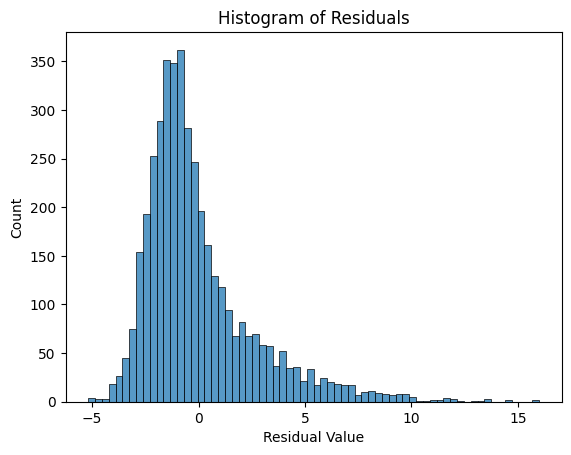

In [14]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

In [15]:
# the distribution is not normal it is skewed to the right (disproving normality)

In [16]:
# using another exploratory data analysis tool to check for normality of residuals using quantile-quantile plot
#importing the necessary package
import statsmodels.api as sm

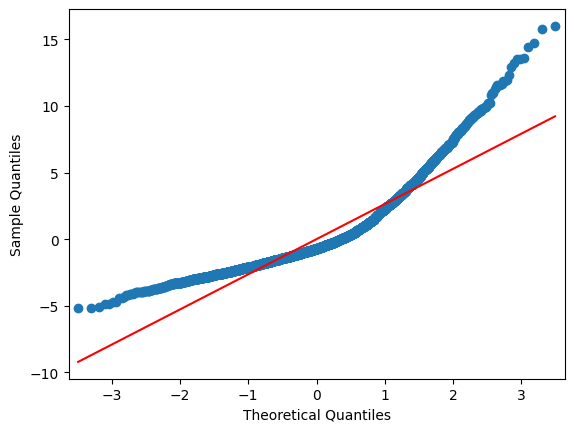

In [ ]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

In [18]:
# the points arenot aligned at the red line disproving normality 

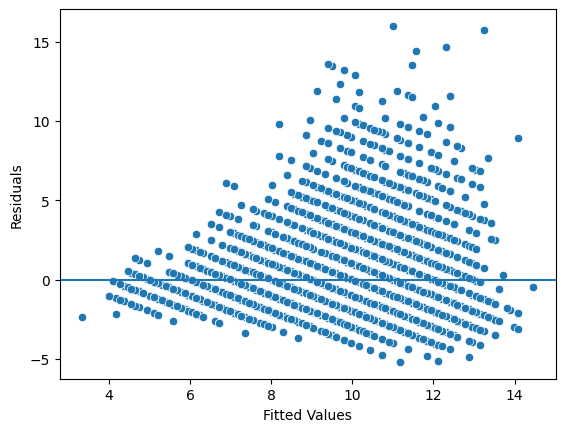

In [19]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

In [20]:
# did not form random cloud , it formed a cone shape which is heteroscedacity 

### Model 2

In [21]:
# formula construction 
ols_formula = "Rings ~ Viscera_weight"

#data construction 
ols_data = abalone_data[["Rings", "Viscera_weight"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1420.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          8.57e-268
Time:                        05:14:58   Log-Likelihood:                -10205.
No. Observations:                4177   AIC:                         2.041e+04
Df Residuals:                    4175   BIC:                         2.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2574      0.083     87.367      0.000       7.095       7.420
Viscera_weight    14.8192      0.393     37.686      0.000      14.048      15.590
==============================================================================
Omnibus:                     1317.583   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4151.093
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                       6.667   Cond. No.                         9.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

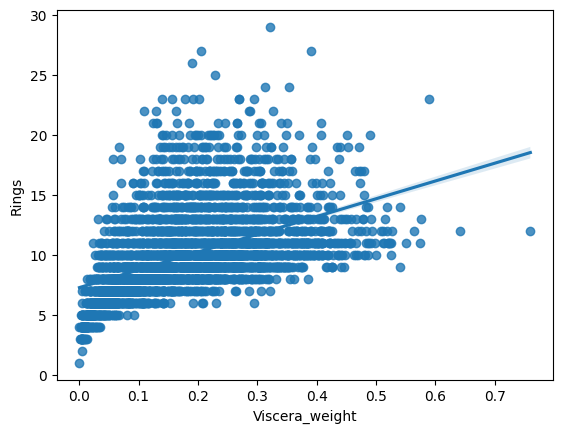

In [22]:
# using the regplot to visualize the regression line 
sns.regplot(x="Viscera_weight", y="Rings", data=ols_data)

#showing the plot
plt.show()

In [23]:
#subsetting the x variable of Model 1
X = ols_data["Viscera_weight"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

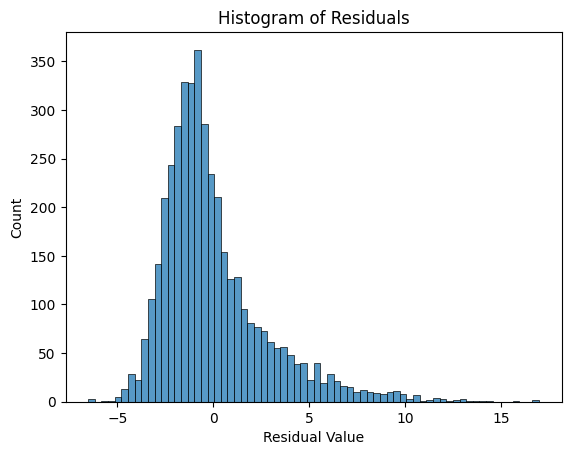

In [24]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

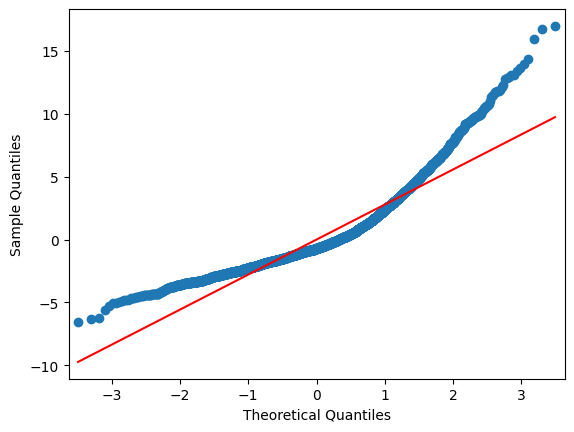

In [25]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

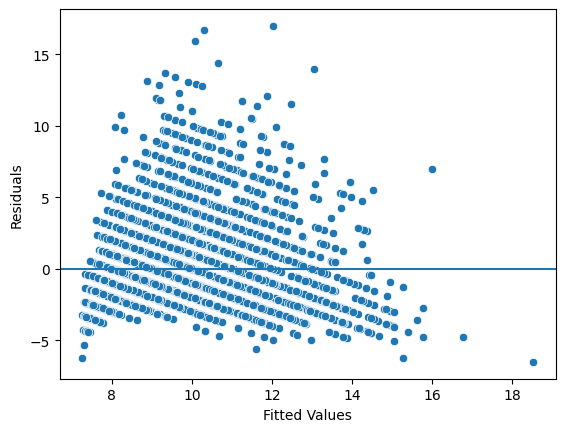

In [26]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()